# EECS 492 - Discussion 8

This notebook is a simple example of how to use Keras, Colab and DNNs for regression. I based this on [MIT/Lex Fridman's Intro to Deep Learning Notebook](https://colab.research.google.com/github/lexfridman/mit-deep-learning/blob/master/tutorial_deep_learning_basics/deep_learning_basics.ipynb#scrollTo=0zvB05OSD7le). If you're interested in learning more about keras and various topics within Deep Learning, the notebook is a very nice start!

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.models as models

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In this example. we'll be using the Boston Housing Prices dataset. Our goal is going to be to predict house prices given some information about where the house is located.

Ref. The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978


 Variables in order:

 CRIM  :   per capita crime rate by town

 ZN    :   proportion of residential land zoned for lots over 25,000 sq.ft.

 INDUS :   proportion of non-retail business acres per town

 CHAS   :  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

 NOX   :   nitric oxides concentration (parts per 10 million)

 RM    :   average number of rooms per dwelling

 AGE   :  proportion of owner-occupied units built prior to 1940

 DIS   : weighted distances to five Boston employment centres

 RAD   :  index of accessibility to radial highways

 TAX   :  full-value property-tax rate per $10,000

 PTRATIO : pupil-teacher ratio by town

 B    :    1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

 LSTAT  :  % lower status of the population

 MEDV :   Median value of owner-occupied homes in $1000's

For the Boston housing dataset, we get 506 rows of data, with 13 features in each. Our task is to build a regression model that takes these 13 features as input and output a single value prediction of the "median value of owner-occupied homes (in $1000)."

Now, we load the dataset. Loading the dataset returns four NumPy arrays:

The train_images and train_labels arrays are the training set—the data the model uses to learn.
The model is tested against the test set, the test_images, and test_labels arrays.

In [2]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
# Note that you don't need to do this for HW3 - it is already done for you. This very good standard practice
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

57026/57026 [==============================] - 0s 0us/step


Lets look at the shape (i.e., the dimensions) of the data - this will tell us if the data was generated correctly. We should have 506 data points in total, with each having 13 values.

In [3]:
print("Training Data:")
print(train_features.shape)
print(train_labels.shape)
print("Testing Data:")
print(test_features.shape)
print(test_labels.shape)

Training Data:
(404, 13)
(404,)
Testing Data:
(102, 13)
(102,)


Lets look at a single training example

In [4]:
print("X:", train_features[0])
print("Y:", train_labels[0])

X: [-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ]
Y: 15.2


In [5]:
# The functional version - how HW 3 is set up
def build_model():
  inputLayer = layers.Input(shape=(13))
  x = inputLayer
  x = layers.Dense(20, activation="relu")(x)
  x = layers.Dense(1, activation="linear")(x)

  return models.Model(inputs=inputLayer, outputs=x)


# The sequential version
def build_model_alternative():
    model = keras.Sequential([
        layers.Dense(20, activation="relu", input_shape=[13]),
        layers.Dense(1)
    ])

    model.compile(optimizer=tf.train.AdamOptimizer(), 
                  loss='mse',
                  metrics=['mae', 'mse'])
    return model

In [6]:
dnn_model = build_model()

# Using SGD optimizer with a learning rate of 0.001 and mean squared error loss
dnn_model.compile(optimizer=optimizers.SGD(learning_rate=0.001), 
                  loss='mean_squared_error',
                  metrics=['mae', 'mse'])
dnn_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


Lets visualize this model a bit better to see how it looks

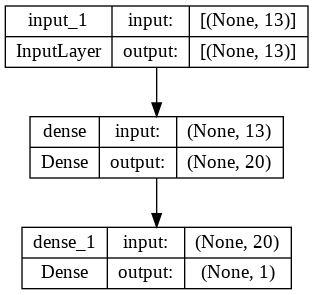

In [7]:
from keras.utils.vis_utils import plot_model
plot_model(dnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
history = dnn_model.fit(train_features,  # The input features X
                        train_labels,    # The target output y
                        batch_size=32, 
                        epochs=200, 
                        verbose=1, 
                        validation_split = 0.1)

# We're just adding this in here to keep track of our training history
# This lets us analyse our performance over time - a very useful tool!
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# show RMSE measure to compare to Kaggle leaderboard on https://www.kaggle.com/c/boston-housing/leaderboard
rmse_final = np.sqrt(float(hist['val_mae'].tail(1)))
print()
print('Final Root Mean Square Error on validation set: {}'.format(round(rmse_final, 3)))

Epoch 1/200
12/12 [==============================] - 2s 48ms/step - loss: 554.0031 - mae: 21.4843 - mse: 554.0031 - val_loss: 395.5144 - val_mae: 18.7044 - val_mse: 395.5144
Epoch 2/200
12/12 [==============================] - 0s 13ms/step - loss: 422.1843 - mae: 18.3379 - mse: 422.1843 - val_loss: 236.5084 - val_mae: 14.2921 - val_mse: 236.5084
Epoch 3/200
12/12 [==============================] - 0s 6ms/step - loss: 245.0822 - mae: 13.0834 - mse: 245.0822 - val_loss: 98.7623 - val_mae: 8.6187 - val_mse: 98.7623
Epoch 4/200
12/12 [==============================] - 0s 13ms/step - loss: 129.5894 - mae: 8.7443 - mse: 129.5894 - val_loss: 50.5611 - val_mae: 6.1272 - val_mse: 50.5611
Epoch 5/200
12/12 [==============================] - 0s 8ms/step - loss: 81.1747 - mae: 6.5975 - mse: 81.1747 - val_loss: 34.5008 - val_mae: 4.9163 - val_mse: 34.5008
Epoch 6/200
12/12 [==============================] - 0s 6ms/step - loss: 57.0728 - mae: 5.3891 - mse: 57.0728 - val_loss: 26.8051 - val_mae: 4.24

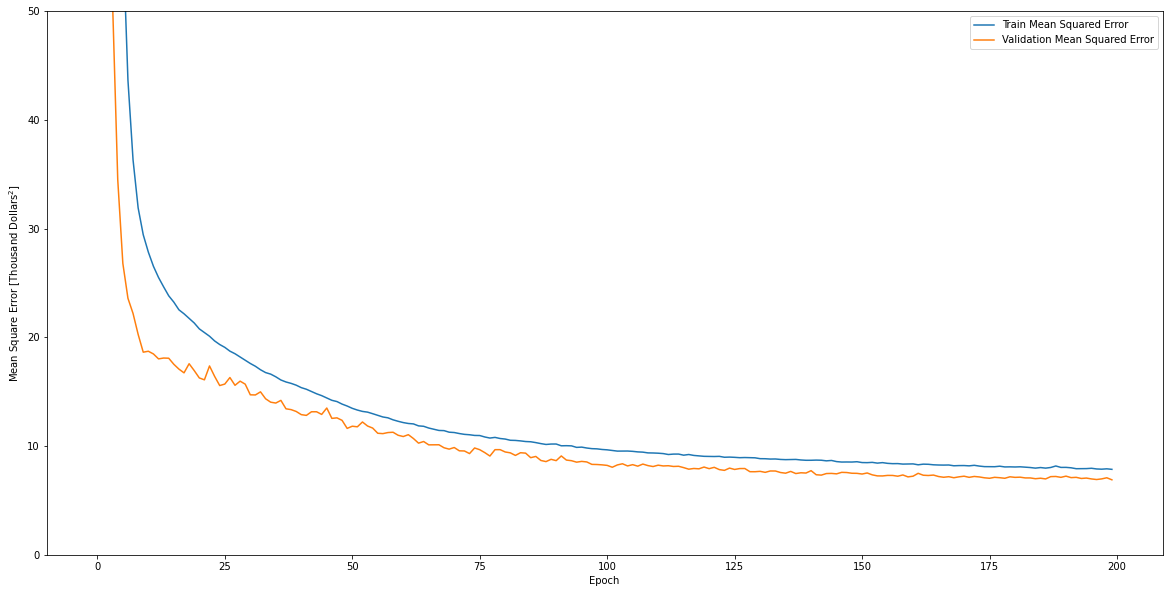

In [9]:
plt.rcParams['figure.figsize'] = [20, 10]
def plot_history(hist):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [Thousand Dollars$^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Mean Squared Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Validation Mean Squared Error')
    plt.legend()
    plt.ylim([0,50])

plot_history(hist)

Lets make a prediction now!

In [10]:
sample_input = test_features[0]
print("test Input:", sample_input)
prediction = dnn_model.predict( np.array( [sample_input,] ) )[0]
print("Prediction:", prediction[0])
print("True value:", test_labels[0])

test Input: [ 18.0846   0.      18.1      0.       0.679    6.434  100.       1.8347
  24.     666.      20.2     27.25    29.05  ]
1/1 [==============================] - 0s 109ms/step
Prediction: 2360.4436
True value: 7.2


If the error seems strange - don't forget that we normalized the input data!
While we have access to the test data, in an actual use case, we have no control over what data we process. As such, we normalize the inputs on the test data's mean and standard deviation

In [11]:
test_features_norm = (test_features - train_mean) / train_std

In [12]:
sample_input = test_features_norm[0]
print("test Input:", sample_input)
prediction = dnn_model.predict( np.array( [sample_input,] ) )[0]
print("Prediction:", prediction[0])
print("True value:", test_labels[0])

test Input: [ 1.55369355 -0.48361547  1.0283258  -0.25683275  1.03838067  0.23545815
  1.11048828 -0.93976936  1.67588577  1.5652875   0.78447637 -3.48459553
  2.25092074]
1/1 [==============================] - 0s 18ms/step
Prediction: 7.8942785
True value: 7.2


Much better :)

To wrap things up, lets compute our performance on the entire test dataset

In [13]:
mse, _, _ = dnn_model.evaluate(test_features_norm, test_labels)
rmse = np.sqrt(mse)
print('Root Mean Square Error on test set: {}'.format(round(rmse, 3)))

4/4 [==============================] - 0s 3ms/step - loss: 19.5403 - mae: 2.8712 - mse: 19.5403
Root Mean Square Error on test set: 4.42
